<a href="https://colab.research.google.com/github/alveslore/high-cholesterol-and-heart-failure/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**O colesterol total acima da meta tem rela√ß√£o com Insufici√™ncia Card√≠aca?**

A **insufici√™ncia card√≠aca** √© uma condi√ß√£o em que o cora√ß√£o n√£o consegue bombear sangue de forma eficiente, causando sintomas como falta de ar, incha√ßo e cansa√ßo. Ela pode ser controlada com medicamentos, mudan√ßas no estilo de vida e, em casos graves, dispositivos ou cirurgias.

O **colesterol alto** est√° diretamente relacionado √† insufici√™ncia card√≠aca, pois n√≠veis elevados de LDL ("ruim") levam ao ac√∫mulo de placas de gordura nas art√©rias (aterosclerose), dificultando o fluxo de sangue e enfraquecendo o cora√ß√£o. Tamb√©m est√° associado √† inflama√ß√£o e estresse oxidativo, que agravam o risco cardiovascular.

Para **prevenir problemas card√≠acos**, √© essencial manter o colesterol total abaixo de 190 mg/dL, LDL abaixo de 100 mg/dL (ou 70 mg/dL para alto risco) e HDL acima de 40 mg/dL (homens) ou 50 mg/dL (mulheres).


Enquanto estudava sobre insufici√™ncia card√≠aca, tive a ideia de treinar minhas habilidades em an√°lises estat√≠sticas usando Python. Decidi investigar se n√≠veis de colesterol acima das metas estabelecidas t√™m uma rela√ß√£o estat√≠stica com a presen√ßa de insufici√™ncia card√≠aca. Para isso, utilizei o dataset **Heart Disease** dispon√≠vel no Kaggle e explorei os dados para chegar a algumas respostas. Foi uma √≥tima oportunidade de unir aprendizado t√©cnico com um tema importante na √°rea de sa√∫de! :)

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Iniciei explorando e analisando esse dataset:

In [ ]:
df = pd.read_csv(f'heartv1.csv')
print(df.head())
print(df.info())

      sex  age  cp  resting_BP  chol  fbs  restecg  thalach   exang  oldpeak  \
0    male   65   0         130   254    0        0       147      0      1.4   
1    male   53   0         140   261    0        0       186      1      0.0   
2    male   50   0         122   222    0        0       186      0      0.0   
3  female   47   1         112   160    0        1       138      0      0.0   
4    male   47   0         142   309    0        0       147      1      0.0   

   slope  ca  thal  Max Heart Rate Reserve  Heart Disease Risk Score  target  
0      1   1     3                      10                     11.44       0  
1      2   0     2                     -17                     13.51       1  
2      2   0     2                     -14                      9.46       1  
3      1   0     2                      37                      8.34       1  
4      1   3     3                      28                     13.43       0  
<class 'pandas.core.frame.DataFrame'>
RangeIn

Em seguida, examinei a distribui√ß√£o de pessoas com doen√ßa card√≠aca, al√©m de analisar a idade dos pacientes e os n√≠veis de colesterol.

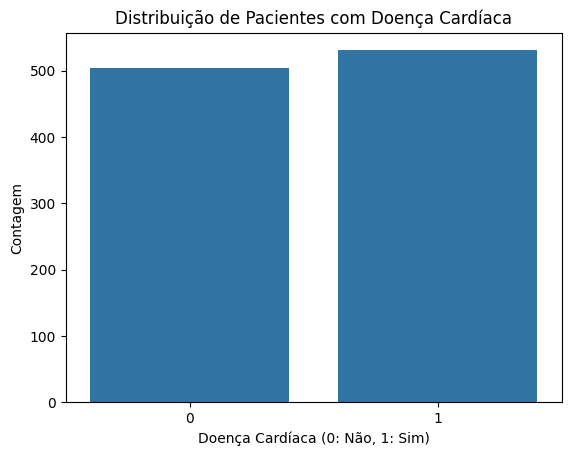

In [ ]:
sns.countplot(data=df, x='target')
plt.title('Distribui√ß√£o de Pacientes com Doen√ßa Card√≠aca')
plt.xlabel('Doen√ßa Card√≠aca (0: N√£o, 1: Sim)')
plt.ylabel('Contagem')
plt.show()

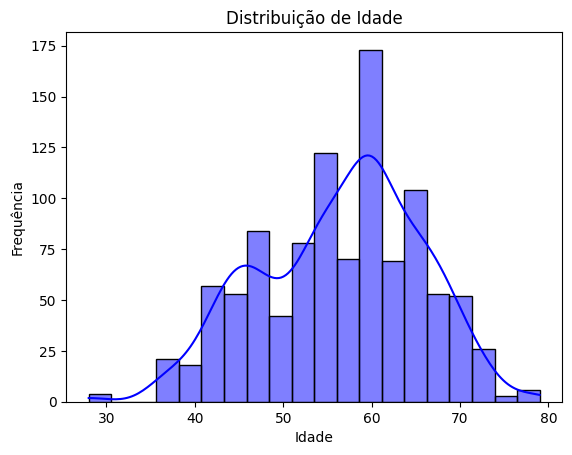

In [ ]:
sns.histplot(data=df, x='age', kde=True, color='blue')
plt.title('Distribui√ß√£o de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequ√™ncia')
plt.show()

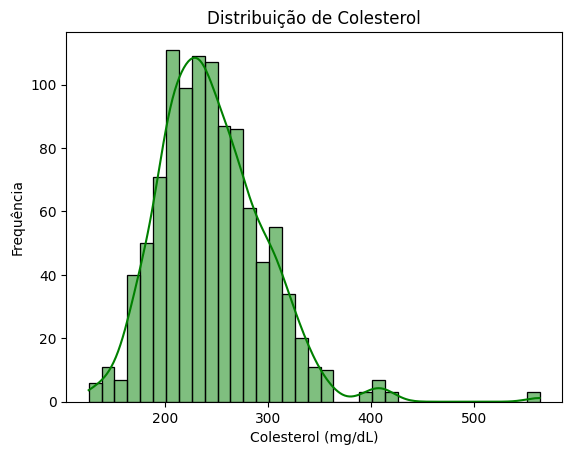

In [ ]:
sns.histplot(data=df, x='chol', kde=True, color='green')
plt.title('Distribui√ß√£o de Colesterol')
plt.xlabel('Colesterol (mg/dL)')
plt.ylabel('Frequ√™ncia')
plt.show()

Tamb√©m **criei uma nova coluna para identificar os pacientes com colesterol alto**. Como eu n√£o sabia se os valores de colesterol no dataset se referiam ao total ou apenas ao LDL, observei que n√£o havia ningu√©m com colesterol abaixo de 130 e, por isso, presumi que os valores representavam o colesterol total.

<ipython-input-11-1e8173990134>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='colesterol_alto', palette='coolwarm')


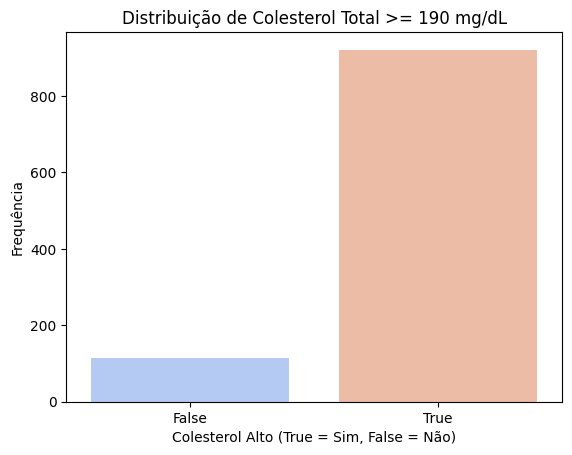

In [ ]:
df['colesterol_alto'] = df['chol'] >= 190
sns.countplot(data=df, x='colesterol_alto', palette='coolwarm')
plt.title('Distribui√ß√£o de Colesterol Total >= 190 mg/dL')
plt.xlabel('Colesterol Alto (True = Sim, False = N√£o)')
plt.ylabel('Frequ√™ncia')
plt.show()



Realizei o teste do qui-quadrado porque queria avaliar se havia uma rela√ß√£o estat√≠stica significativa entre os n√≠veis de colesterol alto (acima de 190) e a presen√ßa de doen√ßa card√≠aca. Como ambas as vari√°veis s√£o categ√≥ricas ‚Äî uma indicando se o colesterol est√° alto (True/False) e a outra mostrando a presen√ßa ou aus√™ncia de doen√ßa card√≠aca (0/1) ‚Äî o teste do qui-quadrado √© ideal para identificar associa√ß√µes em tabelas de conting√™ncia. Ele permite determinar se a diferen√ßa nas frequ√™ncias observadas entre os grupos √© maior do que seria esperado por acaso.

In [ ]:
contingency_table = pd.crosstab(df['colesterol_alto'], df['target'])
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("Existe uma associa√ß√£o significativa entre colesterol > 190 e doen√ßa card√≠aca.")
else:
    print("N√£o h√° associa√ß√£o significativa entre colesterol > 190 e doen√ßa card√≠aca.")


Chi-squared: 0.15577875852677533
P-value: 0.6930730278970442
N√£o h√° associa√ß√£o significativa entre colesterol > 190 e doen√ßa card√≠aca.


O resultado mostrou que, estatisticamente, n√£o havia uma rela√ß√£o significativa entre colesterol alto e a presen√ßa de doen√ßa card√≠aca no dataset que analisei. Mas calma l√°, isso n√£o √© motivo para sair comemorando e comer um McDonald‚Äôs! üòÖ √Äs vezes, os resultados de an√°lises podem divergir da literatura por v√°rios motivos, como o tamanho da amostra, a representatividade dos dados ou at√© a abordagem utilizada. Al√©m disso, vale lembrar que isso n√£o √© uma pesquisa cient√≠fica completa, foi s√≥ uma forma de eu praticar minhas habilidades em Python e an√°lise estat√≠stica. Ent√£o, melhor seguir as recomenda√ß√µes m√©dicas sobre colesterol, ok? üòä